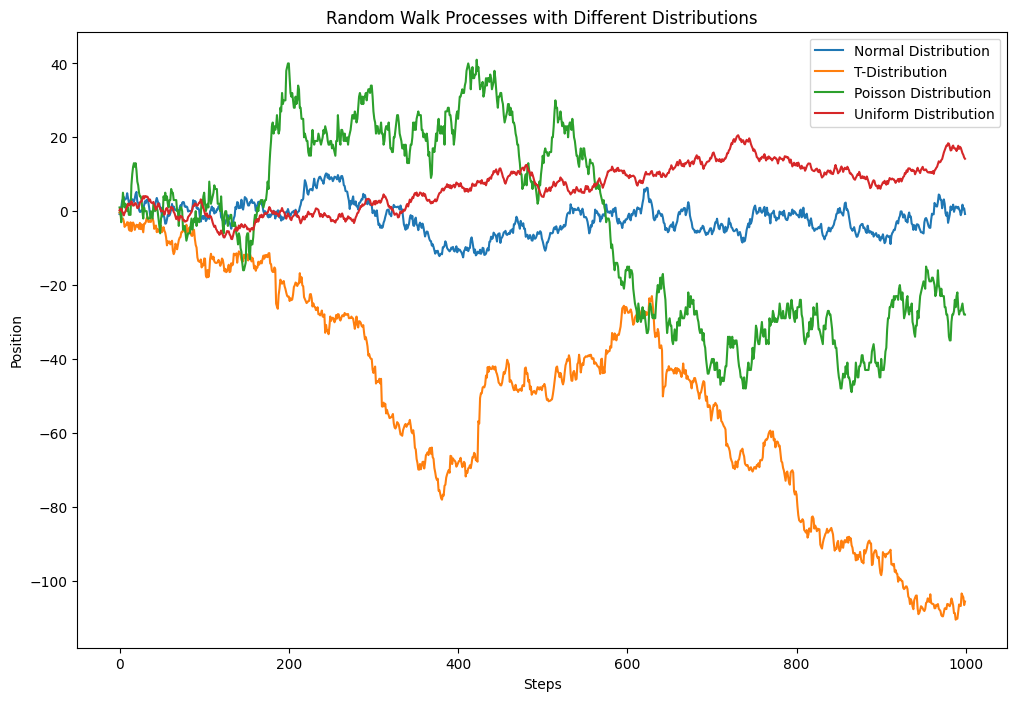

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of steps in the random walk

# Random walk with normal distribution
mu, sigma = 0, 1  # Mean and standard deviation
normal_steps = np.random.normal(mu, sigma, n)
normal_walk = np.cumsum(normal_steps)

# Random walk with t-distribution
df = 4  # Degrees of freedom for t-distribution
t_steps = np.random.standard_t(df, n)
t_walk = np.cumsum(t_steps)

# Random walk with poisson distribution
lambda_poisson = 5  # Lambda for poisson distribution
poisson_steps = np.random.poisson(lambda_poisson, n) - lambda_poisson
poisson_walk = np.cumsum(poisson_steps)

# Random walk with uniform distribution
low, high = -1, 1  # Range for uniform distribution
uniform_steps = np.random.uniform(low, high, n)
uniform_walk = np.cumsum(uniform_steps)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(normal_walk, label='Normal Distribution')
plt.plot(t_walk, label='T-Distribution')
plt.plot(poisson_walk, label='Poisson Distribution')
plt.plot(uniform_walk, label='Uniform Distribution')

plt.title('Random Walk Processes with Different Distributions')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()

plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def generate_random_walk(n, distribution, **kwargs):
    """
    Generate a random walk of length n for a given distribution.

    Args:
    n (int): Number of steps in the random walk.
    distribution (str): Type of distribution ('normal', 't', 'poisson', 'uniform').
    **kwargs: Additional parameters for the distributions.

    Returns:
    numpy.ndarray: Cumulative sum of random walk.
    """
    if distribution == 'normal':
        steps = np.random.normal(kwargs.get('mu', 0), kwargs.get('sigma', 1), n)
    elif distribution == 't':
        steps = np.random.standard_t(kwargs.get('df', 10), n)
    elif distribution == 'poisson':
        lambda_poisson = kwargs.get('lambda', 5)
        steps = np.random.poisson(lambda_poisson, n) - lambda_poisson
    elif distribution == 'uniform':
        steps = np.random.uniform(kwargs.get('low', -1), kwargs.get('high', 1), n)
    else:
        raise ValueError("Invalid distribution type")

    return np.cumsum(steps)

def plot_random_walks(n, x, distributions, **kwargs):
    """
    Generate and plot random walks for given distributions.

    Args:
    n (int): Number of steps in each random walk.
    x (int): Number of random walks to generate for averaging.
    distributions (list): List of distribution types to plot.
    **kwargs: Additional parameters for the distributions.
    """
    plt.figure(figsize=(12, 8))

    for dist in distributions:
        walks = np.array([generate_random_walk(n, dist, **kwargs.get(dist, {})) for _ in range(x)])
        mean_walk = np.mean(walks, axis=0)
        std_error = np.std(walks, axis=0) / np.sqrt(x)
        confidence_interval = stats.norm.interval(0.95, loc=mean_walk, scale=std_error)

        plt.plot(mean_walk, label=f'{dist.capitalize()} Distribution')
        plt.fill_between(range(n), confidence_interval[0], confidence_interval[1], alpha=0.3)

    plt.title('Average Random Walks with 95% Confidence Bands')
    plt.xlabel('Steps')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

# Example usage
n = 1000  # Number of steps in each random walk
x = 100  # Number of random walks to generate for averaging
distributions = ['normal', 't', 'poisson', 'uniform']
kwargs = {
    'normal': {'mu': 0, 'sigma': 0.1},
    't': {'df': 10},
    'poisson': {'lambda': 5},
    'uniform': {'low': -1, 'high': 1}
}

# plot_random_walks(n, x, distributions, **kwargs)
# You can uncomment the last line to run the function with the example parameters.


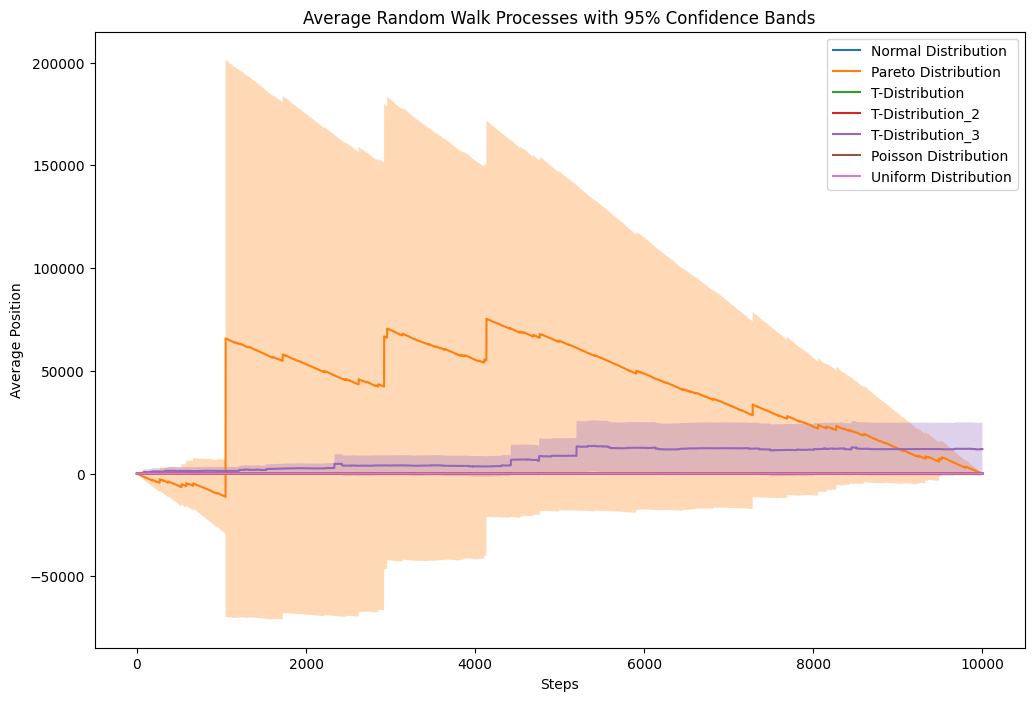

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def random_walk_normal(n, mu=0, sigma=1):
    steps = np.random.normal(mu, sigma, n)
    return np.cumsum(steps)

def random_walk_t(n, df=8):
    steps = np.random.standard_t(df, n)
    return np.cumsum(steps)
def random_walk_t_2(n, df=4):
    steps = np.random.standard_t(df, n)
    return np.cumsum(steps)
def random_walk_t_3(n, df=1):
    steps = np.random.standard_t(df, n)
    return np.cumsum(steps)

def random_walk_poisson(n, lambda_poisson=1):
    steps = np.random.poisson(lambda_poisson, n) - lambda_poisson
    return np.cumsum(steps)

def random_walk_uniform(n, low=-1.73205080756, high=1.73205080756):
    steps = np.random.uniform(low, high, n)
    return np.cumsum(steps)
    
def random_walk_pareto(n, alpha=1, xm=1): #2.8393
    # Draw steps from a Pareto distribution
    steps = np.random.pareto(alpha, n) * xm

    # Adjust steps to have a mean of 0
    mean_adjusted_steps = steps - np.mean(steps) 

    # Perform the random walk
    return np.cumsum(mean_adjusted_steps)
    
def calculate_confidence_intervals(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    sem = stats.sem(data, axis=0)
    interval = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - interval, mean + interval

def plot_random_walks(x_runs, n_steps):
    normal_walks = [random_walk_normal(n_steps) for _ in range(x_runs)]
    t_walks = [random_walk_t(n_steps) for _ in range(x_runs)]
    pareto_walks = [random_walk_pareto(n_steps) for _ in range(x_runs)]
    t_walks_2 = [random_walk_t_2(n_steps) for _ in range(x_runs)]
    t_walks_3 = [random_walk_t_3(n_steps) for _ in range(x_runs)]
    poisson_walks = [random_walk_poisson(n_steps) for _ in range(x_runs)]
    uniform_walks = [random_walk_uniform(n_steps) for _ in range(x_runs)]

    # Calculate mean and confidence intervals
    normal_mean, normal_lower, normal_upper = calculate_confidence_intervals(normal_walks)
    t_mean, t_lower, t_upper = calculate_confidence_intervals(t_walks)
    pareto_mean, pareto_lower, pareto_upper = calculate_confidence_intervals(pareto_walks)
    poisson_mean, poisson_lower, poisson_upper = calculate_confidence_intervals(poisson_walks)
    uniform_mean, uniform_lower, uniform_upper = calculate_confidence_intervals(uniform_walks)
    t_mean_2, t_lower_2, t_upper_2 = calculate_confidence_intervals(t_walks_2)
    t_mean_3, t_lower_3, t_upper_3 = calculate_confidence_intervals(t_walks_3)

    plt.figure(figsize=(12, 8))

    plt.plot(normal_mean, label='Normal Distribution')
    plt.fill_between(range(n_steps), normal_lower, normal_upper, alpha=0.3)
    plt.plot(pareto_mean, label='Pareto Distribution')
    plt.fill_between(range(n_steps), pareto_lower, pareto_upper, alpha=0.3)
    plt.plot(t_mean, label='T-Distribution')
    plt.fill_between(range(n_steps), t_lower, t_upper, alpha=0.3)
    plt.plot(t_mean_2, label='T-Distribution_2')
    plt.fill_between(range(n_steps), t_lower_2, t_upper_2, alpha=0.3)
    plt.plot(t_mean_3, label='T-Distribution_3')
    plt.fill_between(range(n_steps), t_lower_3, t_upper_3, alpha=0.3)

    plt.plot(poisson_mean, label='Poisson Distribution')
    plt.fill_between(range(n_steps), poisson_lower, poisson_upper, alpha=0.3)

    plt.plot(uniform_mean, label='Uniform Distribution')
    plt.fill_between(range(n_steps), uniform_lower, uniform_upper, alpha=0.3)

    plt.title('Average Random Walk Processes with 95% Confidence Bands')
    plt.xlabel('Steps')
    plt.ylabel('Average Position')
    plt.legend()
    plt.show()

# Parameters
x_runs = 10000  # Number of times each process is run
n_steps = 10000  # Number of steps in each random walk

# Call the plotting function
plot_random_walks(x_runs, n_steps)



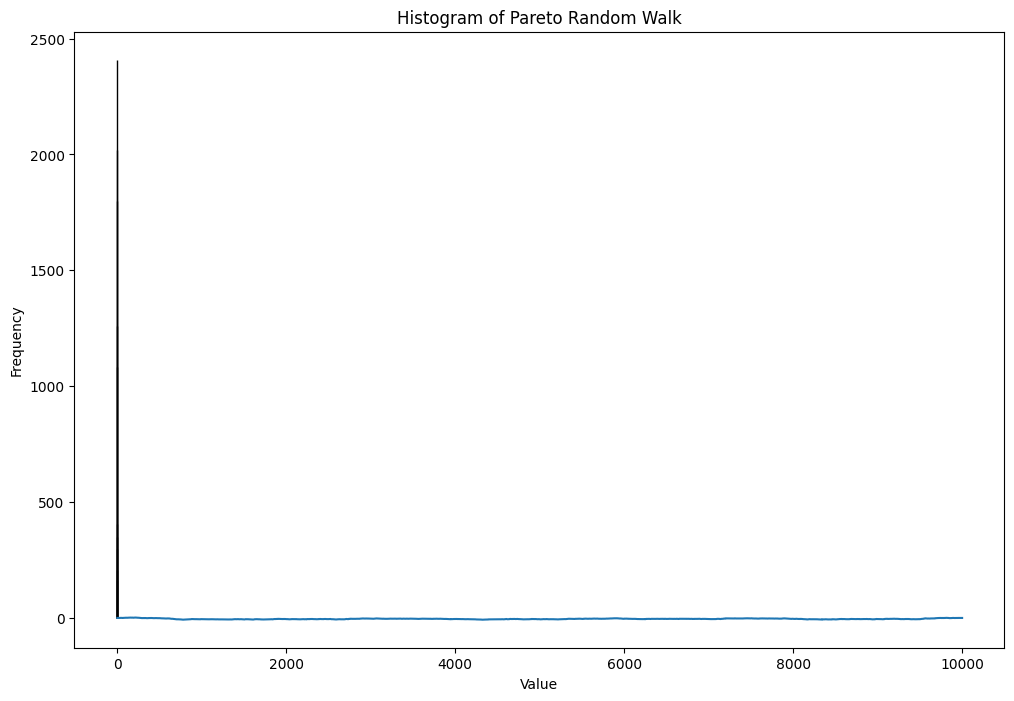

In [16]:
def plot_random_walks(x_runs, n_steps):
    normal_walks = [random_walk_normal(n_steps) for _ in range(x_runs)]
    t_walks = [random_walk_t(n_steps) for _ in range(x_runs)]
    pareto_walks = [random_walk_pareto(n_steps) for _ in range(x_runs)]
    # t_walks_2 = [random_walk_t_2(n_steps) for _ in range(x_runs)]
    # t_walks_3 = [random_walk_t_3(n_steps) for _ in range(x_runs)]
    # poisson_walks = [random_walk_poisson(n_steps) for _ in range(x_runs)]
    # uniform_walks = [random_walk_uniform(n_steps) for _ in range(x_runs)]

    # Calculate mean and confidence intervals
    normal_mean, normal_lower, normal_upper = calculate_confidence_intervals(normal_walks)
    t_mean, t_lower, t_upper = calculate_confidence_intervals(t_walks)
    pareto_mean, pareto_lower, pareto_upper = calculate_confidence_intervals(pareto_walks)
    #poisson_mean, poisson_lower, poisson_upper = calculate_confidence_intervals(poisson_walks)
    #uniform_mean, uniform_lower, uniform_upper = calculate_confidence_intervals(uniform_walks)
    # t_mean_2, t_lower_2, t_upper_2 = calculate_confidence_intervals(t_walks_2)
    # t_mean_3, t_lower_3, t_upper_3 = calculate_confidence_intervals(t_walks_3)
    # Plotting
    plt.figure(figsize=(12, 8))

    plt.plot(pareto_mean, label='Pareto Distribution')
    plt.hist(pareto_mean, edgecolor='black')
    plt.title("Histogram of Pareto Random Walk")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_random_walks(x_runs, n_steps)

